In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas statsmodels

In [3]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00


In [4]:
 #Imports
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [5]:
file_name='/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Time series/WMT.csv'
df =pd.read_csv(file_name)
df

,Date,Adj Close
0,2000-01-03,44.915394
1,2000-01-04,43.234756
2,2000-01-05,42.352402
3,2000-01-06,42.814564
4,2000-01-07,46.049828
...,...,...
5474,2020-12-25,NaN
5475,2020-12-28,142.946777
5476,2020-12-29,142.041183
5477,2020-12-30,141.923065


In [6]:
df.dtypes

Date          object
Adj Close    float64
dtype: object

In [7]:
# Convert the strings to datetime objects
df['Datetime'] = pd.to_datetime(df['Date'])
df.head()

,Date,Adj Close,Datetime
0,2000-01-03,44.915394,2000-01-03
1,2000-01-04,43.234756,2000-01-04
2,2000-01-05,42.352402,2000-01-05
3,2000-01-06,42.814564,2000-01-06
4,2000-01-07,46.049828,2000-01-07


In [8]:
# Specify the two-year period
start_year = 2010
end_year = 2020
# Filter the DataFrame for the specified two-year period
filtered_df = df[(df['Datetime'].dt.year >= start_year) & (df['Datetime'].dt.year <= end_year)]
print(filtered_df)

            Date   Adj Close   Datetime
2609  2010-01-01         NaN 2010-01-01
2610  2010-01-04   40.963638 2010-01-04
2611  2010-01-05   40.555729 2010-01-05
2612  2010-01-06   40.465084 2010-01-06
2613  2010-01-07   40.487759 2010-01-07
...          ...         ...        ...
5474  2020-12-25         NaN 2020-12-25
5475  2020-12-28  142.946777 2020-12-28
5476  2020-12-29  142.041183 2020-12-29
5477  2020-12-30  141.923065 2020-12-30
5478  2020-12-31  141.893524 2020-12-31

[2870 rows x 3 columns]


In [9]:
df.dtypes

Date                 object
Adj Close           float64
Datetime     datetime64[ns]
dtype: object

In [10]:
# Create a datetime index with business day frequency
datetime_index = pd.DatetimeIndex(filtered_df['Datetime'], freq='B')

In [11]:
# Set the datetime index as the index of the DataFrame
filtered_df.set_index(datetime_index, inplace=True)

In [12]:
filtered_df.head()

,Date,Adj Close,Datetime
Datetime,,,
2010-01-01,2010-01-01,NaN,2010-01-01
2010-01-04,2010-01-04,40.963638,2010-01-04
2010-01-05,2010-01-05,40.555729,2010-01-05
2010-01-06,2010-01-06,40.465084,2010-01-06
2010-01-07,2010-01-07,40.487759,2010-01-07


In [13]:
# Check for null values
filtered_df.isna().sum()

Date           0
Adj Close    101
Datetime       0
dtype: int64

In [14]:
# Impute null values
filtered_df = filtered_df.interpolate()
filtered_df.isna().sum()

Date         0
Adj Close    1
Datetime     0
dtype: int64

In [15]:
filtered_df.drop(columns=['Datetime', 'Date'], inplace=True)
filtered_df.head()

,Adj Close
Datetime,
2010-01-01,NaN
2010-01-04,40.963638
2010-01-05,40.555729
2010-01-06,40.465084
2010-01-07,40.487759


In [16]:
filtered_df.dropna(inplace=True)
filtered_df.isna().sum()

Adj Close    0
dtype: int64

In [17]:
from statsmodels.tsa.stattools import adfuller

# Perform the Dickey-Fuller test
adf_result = adfuller(filtered_df)

# Print the test results
print("Dickey-Fuller Test:")
print("Test statistic:", adf_result[0])
print("p-value:", adf_result[1])

# Interpret the results
if adf_result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")

Dickey-Fuller Test:
Test statistic: 1.4487043789843936
p-value: 0.997324546352742
The time series is non-stationary.


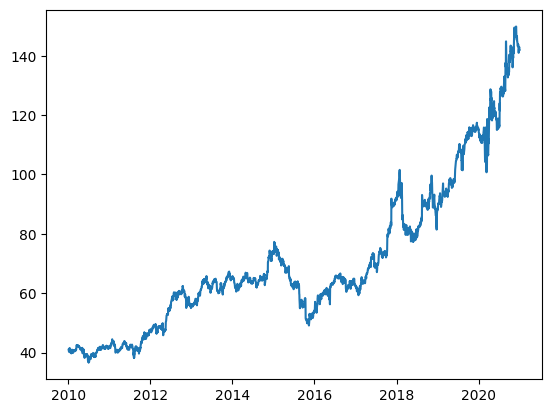

In [18]:
# import python pandas library
import pandas as pd
# import python matplotlib library for plotting
import matplotlib.pyplot as plt
# use simple line plot to see the distribution
# of the data
plt.plot(filtered_df)

In [19]:
df_diff = filtered_df['Adj Close'].diff().dropna()
df_diff

Datetime
2010-01-05   -0.407909
2010-01-06   -0.090645
2010-01-07    0.022675
2010-01-08   -0.203957
2010-01-11    0.664734
                ...   
2020-12-25    0.846519
2020-12-28    0.846519
2020-12-29   -0.905594
2020-12-30   -0.118118
2020-12-31   -0.029541
Freq: B, Name: Adj Close, Length: 2868, dtype: float64

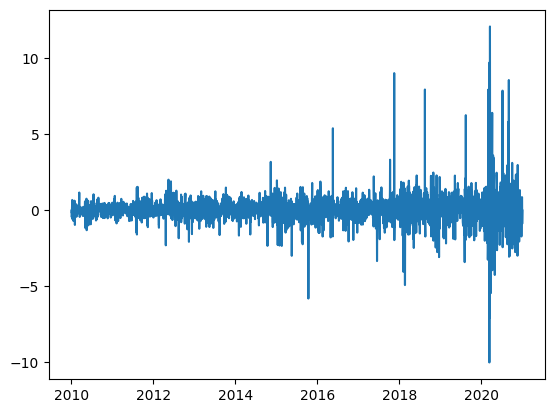

In [20]:
# import python pandas library
import pandas as pd
# import python matplotlib library for plotting
import matplotlib.pyplot as plt
# use simple line plot to see the distribution
# of the data
plt.plot(df_diff)


In [21]:
# Step 4: Check for Stationarity Again
result_diff = adfuller(df_diff)
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])


ADF Statistic after differencing: -12.222148324357617
p-value after differencing: 1.1010760728457111e-22


In [22]:
import pmdarima

# Calculate the number of differencing needed
d = pmdarima.arima.ndiffs(filtered_df['Adj Close'])

# Print the number of differencing needed
print(f"Number of differencing needed: {d}")

Number of differencing needed: 1


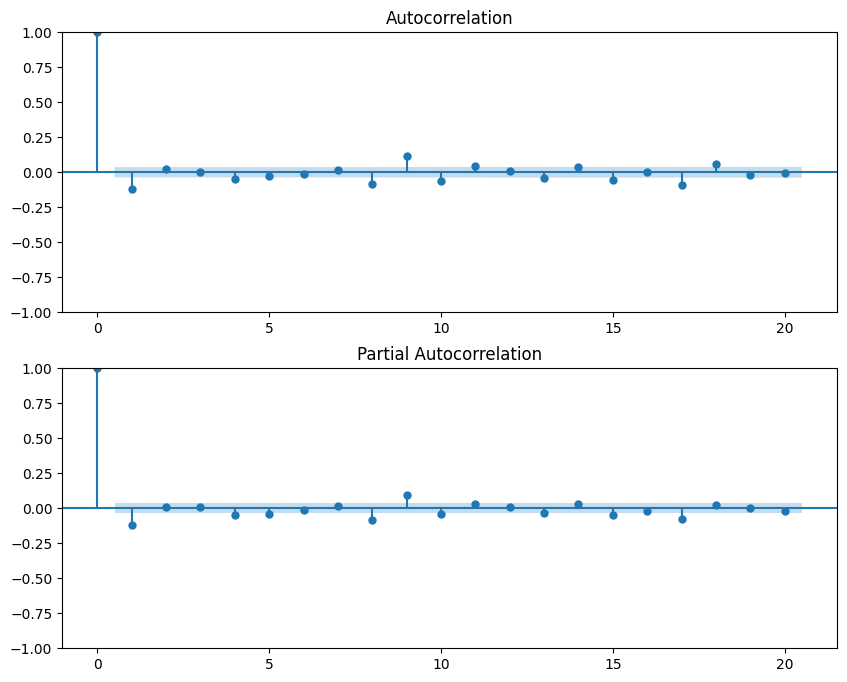

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df_diff, ax=ax[0], lags=20)
plot_pacf(df_diff, ax=ax[1], lags=20)
plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your time series data is stored in a DataFrame called 'df'
# Replace 'date_column' with the name of your date column
# Replace 'value_column' with the name of your value column
# Make sure your DataFrame is indexed by the date column
# Ensure the date column is in datetime format
# Adjust the test_size parameter according to your requirement

# Define the test size in number of rows
test_size_rows = 13 * 5  # 13 weeks x 5 business days per week

# Split the data into training and test sets
train_data, test_data = train_test_split(df_diff, test_size=test_size_rows, shuffle=False)

# Print the shapes of the training and test sets
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)


Training set shape: (2803,)
Test set shape: (65,)


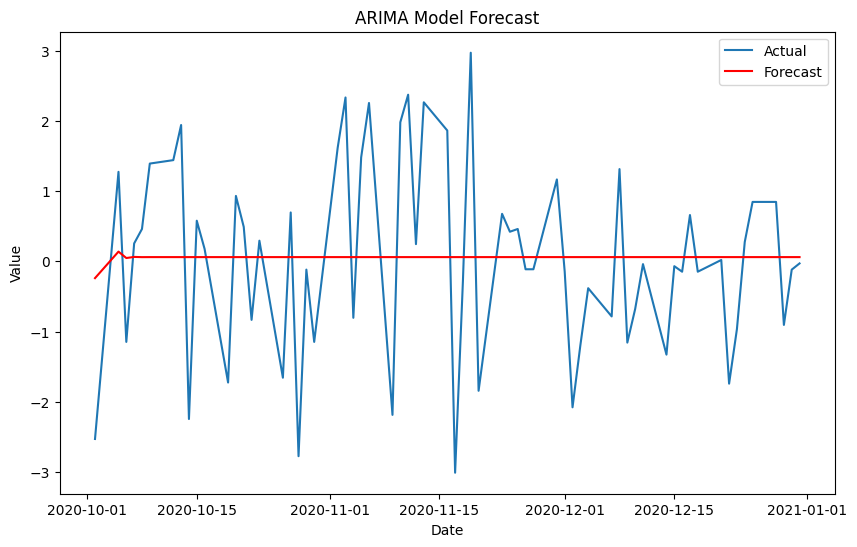

Mean Absolute Error (MAE): 1.0801433994490433
Mean Squared Error (MSE): 1.8394696101986918
Root Mean Squared Error (RMSE): 1.3562704782596617


In [25]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'train_data' and 'test_data' are already defined
# Fit ARIMA model
d = 1
p = 2
q = 1
model = ARIMA(train_data, order=(p, d, q))  # Replace (p, d, q) with your determined orders
arima_model = model.fit()

# Make forecasts
forecasts = arima_model.forecast(steps=len(test_data))

# Plot forecasts vs. test data
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecasts, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

# Calculate evaluation metrics
mae = mean_absolute_error(test_data, forecasts)
mse = mean_squared_error(test_data, forecasts)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


In [26]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define the range of orders to try
p_range = range(0, 3)
d_range = range(0, 3)
q_range = range(0, 3)

# Define lists to store results
results = []

# Iterate over combinations of orders
for p in p_range:
    for d in d_range:
        for q in q_range:
            # Fit ARIMA model
            try:
                model = ARIMA(train_data, order=(p, d, q))
                arima_model = model.fit()

                # Make forecasts
                forecasts = arima_model.forecast(steps=len(test_data))

                # Calculate evaluation metrics
                mae = mean_absolute_error(test_data, forecasts)
                mse = mean_squared_error(test_data, forecasts)
                rmse = np.sqrt(mse)

                # Append results to the list
                results.append((p, d, q, mae, mse, rmse))
            except:
                # Skip if model fitting fails
                continue

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'MAE', 'MSE', 'RMSE'])

# Print the best model based on RMSE
best_model = results_df.loc[results_df['RMSE'].idxmin()]
print("Best model based on RMSE:")
print(best_model)

# Optionally, you can plot the forecasts of the best model
# Replace (best_model['p'], best_model['d'], best_model['q']) with the best orders
# and repeat the model fitting, forecasting, and plotting steps as shown in the previous code snippet


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/s

Best model based on RMSE:
p       1.000000
d       0.000000
q       0.000000
MAE     1.079033
MSE     1.836983
RMSE    1.355353
Name: 9, dtype: float64


In [27]:

# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(actual, forecast):
    return np.mean(np.abs((actual - forecast) / actual)) * 100

# Calculate MAPE
mape = calculate_mape(test_data, forecasts)

# Assess model performance
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

# Evaluate if the model meets the target threshold
if mape < 2:
    print("The model meets the target threshold of less than 2% MAPE.")
else:
    print("The model does not meet the target threshold of less than 2% MAPE.")


Mean Absolute Percentage Error (MAPE): 130.61%
The model does not meet the target threshold of less than 2% MAPE.


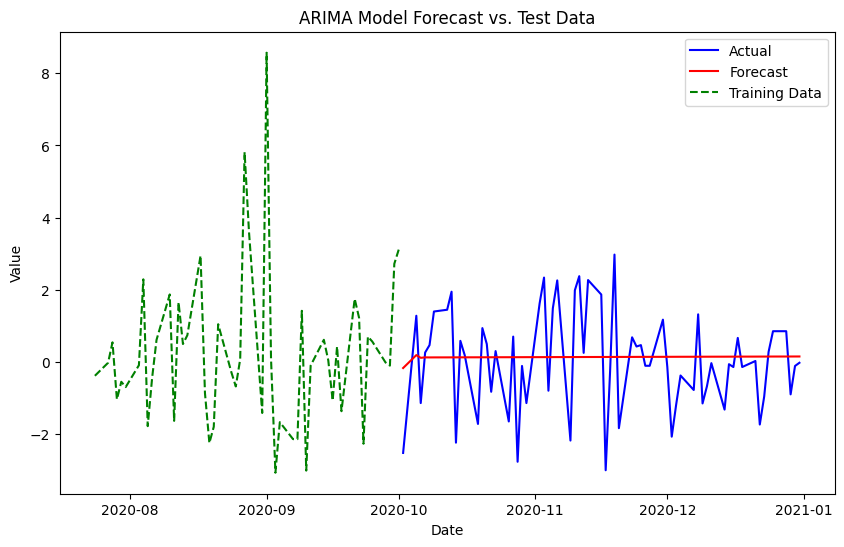

In [28]:
# Plot fewer training data lags
num_train_lags = 50  # Adjust as needed

# Plot forecasts vs. test data
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual', color='blue')
plt.plot(test_data.index, forecasts, label='Forecast', color='red')
plt.plot(train_data.index[-num_train_lags:], train_data[-num_train_lags:], label='Training Data', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model Forecast vs. Test Data')
plt.legend()
plt.show()
